In [2]:
import pandas as pd
from geopy import distance
import matplotlib.pyplot as plt

newport_ri = (-73.988129, 40.732029)
cleveland_oh = (-73.990173, 40.756680)
print(distance.distance(newport_ri, cleveland_oh).km)
# 538.39044536

# print geopy.distance.vincenty(coords_1, coords_2).km

0.7927696970961278


In [1]:
# taxi = pd.read_csv('test.csv')
# taxi

In [2]:
# taxi = taxi.drop(taxi[(taxi.dropoff_latitude < -90.0) | (taxi.dropoff_latitude > 90)].index)
# taxi

In [73]:
# def get_distance(row):
#     return distance.distance((row['pickup_longitude'], row['pickup_latitude']), (row['dropoff_longitude'], row['dropoff_latitude'])).km
    
# taxi['trip_distance'] = taxi.apply(get_distance, axis=1)


In [3]:
sales = pd.read_csv('sales_data.csv')
sales

,Time of event,Month,Order nr,Event ID,Partner name,Order Value,Commission TD,Commission Pub. Total,Commission Total,Status,Last changed
0,1/1/20 8:34:51 AM UTC+3,1,07079-477426,374299,EP,1225,4.90,74.72,79.63,Approved,2/7/2020 17:07
1,1/1/20 8:49:04 AM UTC+3,1,07079-467342,374299,EP,1057,4.23,64.48,68.71,Approved,2/7/2020 17:09
2,1/1/20 9:14:43 AM UTC+3,1,07078-350728,374299,Other,5971,29.84,358.26,388.10,Deleted,2/7/2020 15:12
3,1/1/20 9:14:43 AM UTC+3,1,07079-070656,374299,Other,1027,5.13,61.62,66.75,Deleted,2/7/2020 15:12
4,1/1/20 9:25:28 AM UTC+3,1,57005-657374,374299,EP,1597,6.39,97.42,103.81,Approved,2/7/2020 17:07
...,...,...,...,...,...,...,...,...,...,...,...
60515,6/30/20 11:20:47 PM UTC+3,6,57034-112667,374299,EP,3255,13.03,198.55,211.58,Pending,NaN
60516,6/30/20 11:21:10 PM UTC+3,6,57034-062431,374299,EP,1295,5.18,79.00,84.18,Pending,NaN
60517,6/30/20 11:28:56 PM UTC+3,6,57034-152728,374299,CB,11200,55.98,672.00,727.98,Pending,NaN
60518,6/30/20 11:31:20 PM UTC+3,6,57034-102757,374299,EP,7539,30.17,459.88,490.05,Pending,NaN


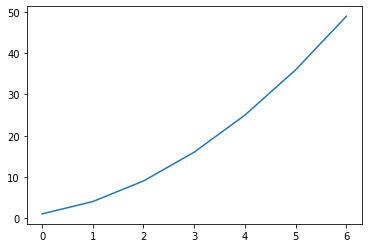

In [8]:
plt
plt.plot([1, 4, 9, 16, 25, 36, 49])

In [20]:
# sales_partners = sales['Partner name'].value_counts().head()

sales_partners = sales.groupby('Partner name').sum().sort_values('Order Value', ascending=True).reset_index()
sales_partners

,Partner name,Month,Event ID,Order Value,Commission TD,Commission Pub. Total,Commission Total
0,C4B,11871,1094075977,11914923,74903.17,766200.28,8.411034e+05
1,Other,16055,1310795098,16268365,112573.84,989020.72,1.101595e+06
2,KT,13868,1379666114,17235300,104683.20,1096197.00,1.200880e+06
3,SK,31249,3121279361,58558966,348091.34,3699835.80,4.047927e+06
4,CB,67901,5649669106,121108014,755761.93,7771021.97,8.526784e+06
5,EP,96834,10097089824,124210074,673500.15,8091354.96,8.764858e+06


<BarContainer object of 6 artists>

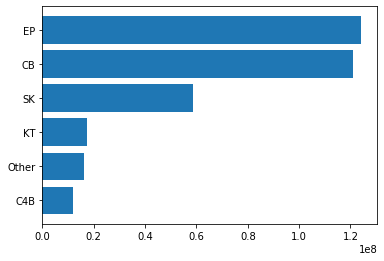

In [21]:
plt.barh(sales_partners['Partner name'], sales_partners['Order Value'])

In [35]:
# sales_partners = sales.groupby(['Month','Partner name']).sum()#.sort_values('Month', ascending=True).reset_index()
sales_partners = sales.pivot_table(index = 'Month', columns = 'Partner name', values = 'Order Value', aggfunc = 'sum', fill_value = 0)
sales_partners

Partner name,C4B,CB,EP,KT,Other,SK
Month,,,,,,
1,87139,0,14584112,1475766,295401,7109801
2,2527985,7706843,17005240,1419216,1091054,6098864
3,2167767,20589762,15610024,2934667,1514487,6795146
4,1288606,17123824,12622850,1994116,1868856,7103054
5,2489772,41974545,34768301,3982285,4898945,18359583
6,3353654,33713040,29619547,5429250,6599622,13092518


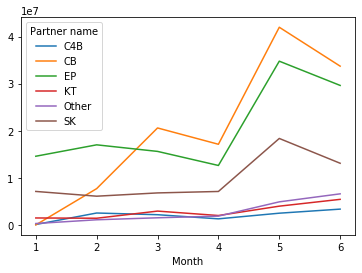

In [36]:
sales_partners.plot()
# plt.barh(sales_partners['Partner name'], sales_partners['Order Value'])
